In [1]:
import skvideo.io
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import tensorly as tl
import matplotlib.ticker as ticker
import tensorsketch
from tensorsketch.tensor_approx import TensorApprox,eval_rerr
import warnings
from tensorly.decomposition import tucker
from tensorsketch.util import RandomInfoBucket, random_matrix_generator
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from matplotlib import colors
from plot_util import *

Using numpy backend.
Using numpy backend.


In [2]:
def load_sketch(name, dim):
    arm_sketches = []
    for i in np.arange(dim): 
        arm_sketches.append(np.load("data/"+name+"_arm"+str(i)+".npy"))
    core_sketch = np.load("data/"+name+"_core.npy")
    return [arm_sketches, core_sketch]

def plot_sketch_class(k = 300, fontsize = 25): 
    walk_sketch = load_sketch('walk_k'+str(k), 3)
    arm_sketches, core_sketch = walk_sketch
    kmeans = KMeans(n_clusters =3,random_state=0).fit(arm_sketches[0][100:2300])
    plt.figure(figsize=(6,5))
    set_plot(fontsize)
    plt.plot(kmeans.labels_, markersize = 10, color = MARKER_COLOR_LIST[0])
    
    plt.title('Linear Sketch (k = ' + str(k)+')', fontsize = fontsize)
    plt.xlabel('Frame', fontsize = fontsize)
    plt.ylabel('Class', fontsize = fontsize)
    plt.yticks(np.arange(3), fontsize = fontsize)
    plt.savefig('plots/'+'vcl_sketch_k'+str(k)+'.pdf')
    plt.show()

def sketch_class(k = 300, fontsize = 18): 
    walk_sketch = load_sketch('walk_k'+str(k), 3)
    arm_sketches, core_sketch = walk_sketch
    kmeans = KMeans(n_clusters =3,random_state=0).fit(arm_sketches[0][100:2300])
    return kmeans.labels_

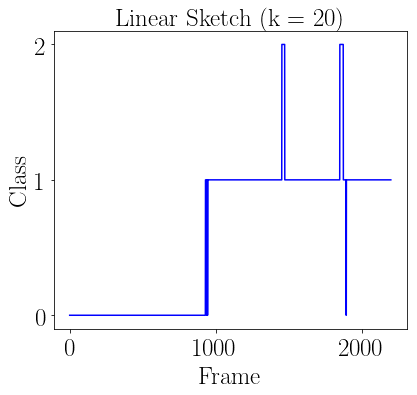

In [4]:
sketch_class(k = 20)

plot_sketch_class(k = 20)

In [27]:
def plot_tucker_class(k = 300, r = 10, fontsize = 25): 

    [tucker_arms,tucker_core] = pickle.load(open("data/walk_tucker_k"+str(k)+"_r"+str(10)+".pickle",'rb'))
    kmeans = KMeans(n_clusters =3,random_state=0).fit(tucker_arms[0][100:2300])

    plt.figure(figsize=(6,5))
    set_plot(fontsize)
    
    plt.plot(kmeans.labels_, markersize = 10, color = MARKER_COLOR_LIST[1])
    
    plt.title('One Pass - Tucker (k = ' + str(k)+', r = '+ str(r)+')', fontsize = fontsize)
    
    plt.xlabel('Frame', fontsize = fontsize)
    plt.ylabel('Class', fontsize = fontsize)
    plt.xticks(fontsize =fontsize)
    plt.yticks(np.arange(3), fontsize =fontsize)
    plt.savefig('plots/'+'vcl_tucker_k'+str(k)+'_r'+str(r)+'.pdf')
    plt.show()

def tucker_class(k = 300, r = 10, fontsize = 24): 

    [tucker_arms,tucker_core] = pickle.load(open("data/walk_tucker_k"+str(k)+"_r"+str(10)+".pickle",'rb'))
    kmeans = KMeans(n_clusters =3,random_state=0).fit(tucker_arms[0][100:2300]) 
    return kmeans.labels_

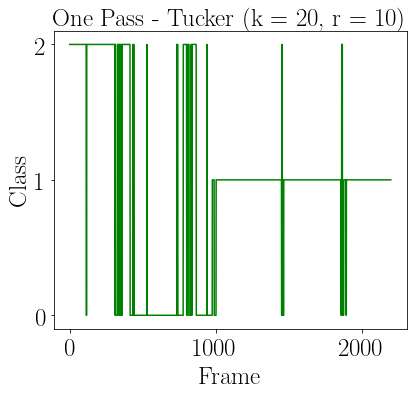

In [28]:
plot_tucker_class(r = 10, k = 20)

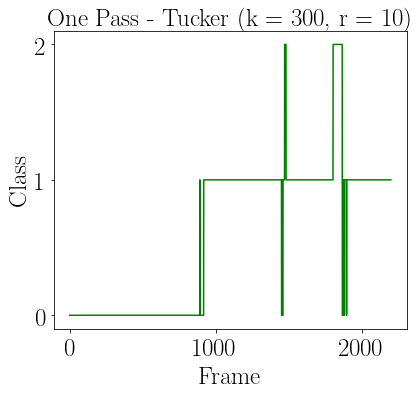

In [ ]:
plot_tucker_class(r = 10)
plot_tucker_class(r = 20)

In [10]:
def plot_tucker_2pass_class(k = 300, r = 10, fontsize = 24): 

    [tucker_arms,tucker_core] = pickle.load(open("data/walk_2pass_tucker_k"+str(k)+"_r"+str(10)+".pickle",'rb'))
    kmeans = KMeans(n_clusters =3,random_state=0).fit(tucker_arms[0][100:2300])

    plt.figure(figsize=(6,5))
    set_plot(fontsize)
    
    for idx,i in enumerate(kmeans.labels_): 
        if  i ==0: 
            kmeans.labels_[idx] = 1
        elif i ==1:
            kmeans.labels_[idx] = 0
    plt.plot(kmeans.labels_, markersize = 10, color = MARKER_COLOR_LIST[1])
    
    plt.title('Two Pass - Tucker ( k = ' + str(k)+', r = '+ str(r) +')', fontsize = fontsize)
    plt.xlabel('Frame', fontsize = fontsize)
    plt.ylabel('Class', fontsize = fontsize)
    plt.yticks(np. arange(3), fontsize =fontsize)
    plt.savefig('plots/'+'vcl_tucker_2pass_k'+str(k)+'_r'+str(r)+'.pdf')
    plt.show()

In [11]:
def tucker_2pass_class(k = 300, r = 10, fontsize = 24): 

    [tucker_arms,tucker_core] = pickle.load(open("data/walk_2pass_tucker_k"+str(k)+"_r"+str(10)+".pickle",'rb'))
    kmeans = KMeans(n_clusters =3,random_state=0).fit(tucker_arms[0][100:2300]) 
    for idx,i in enumerate(kmeans.labels_): 
        if  i ==0: 
            kmeans.labels_[idx] = 1
        elif i ==1:
            kmeans.labels_[idx] = 0
    return kmeans.labels_

In [56]:
plot_tucker_2pass_class(r = 10, k = 20)

NameError: name 'plot_tucker_2pass_class' is not defined

In [13]:
result1 = sketch_class(k = 20)
result2 = tucker_2pass_class(r = 10, k = 20)
result3 = tucker_class(r = 10, k = 20)
result4 = tucker_class(r = 10)


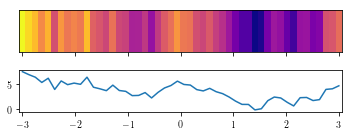

In [14]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
plt.rcParams["figure.figsize"] = 5,2

x = np.linspace(-3,3)
y = np.cumsum(np.random.randn(50))+6

fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True)

extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

ax2.plot(x,y)

plt.tight_layout()
plt.show()


In [15]:
extent = [0,2200,0,1]

NameError: name 'result1' is not defined

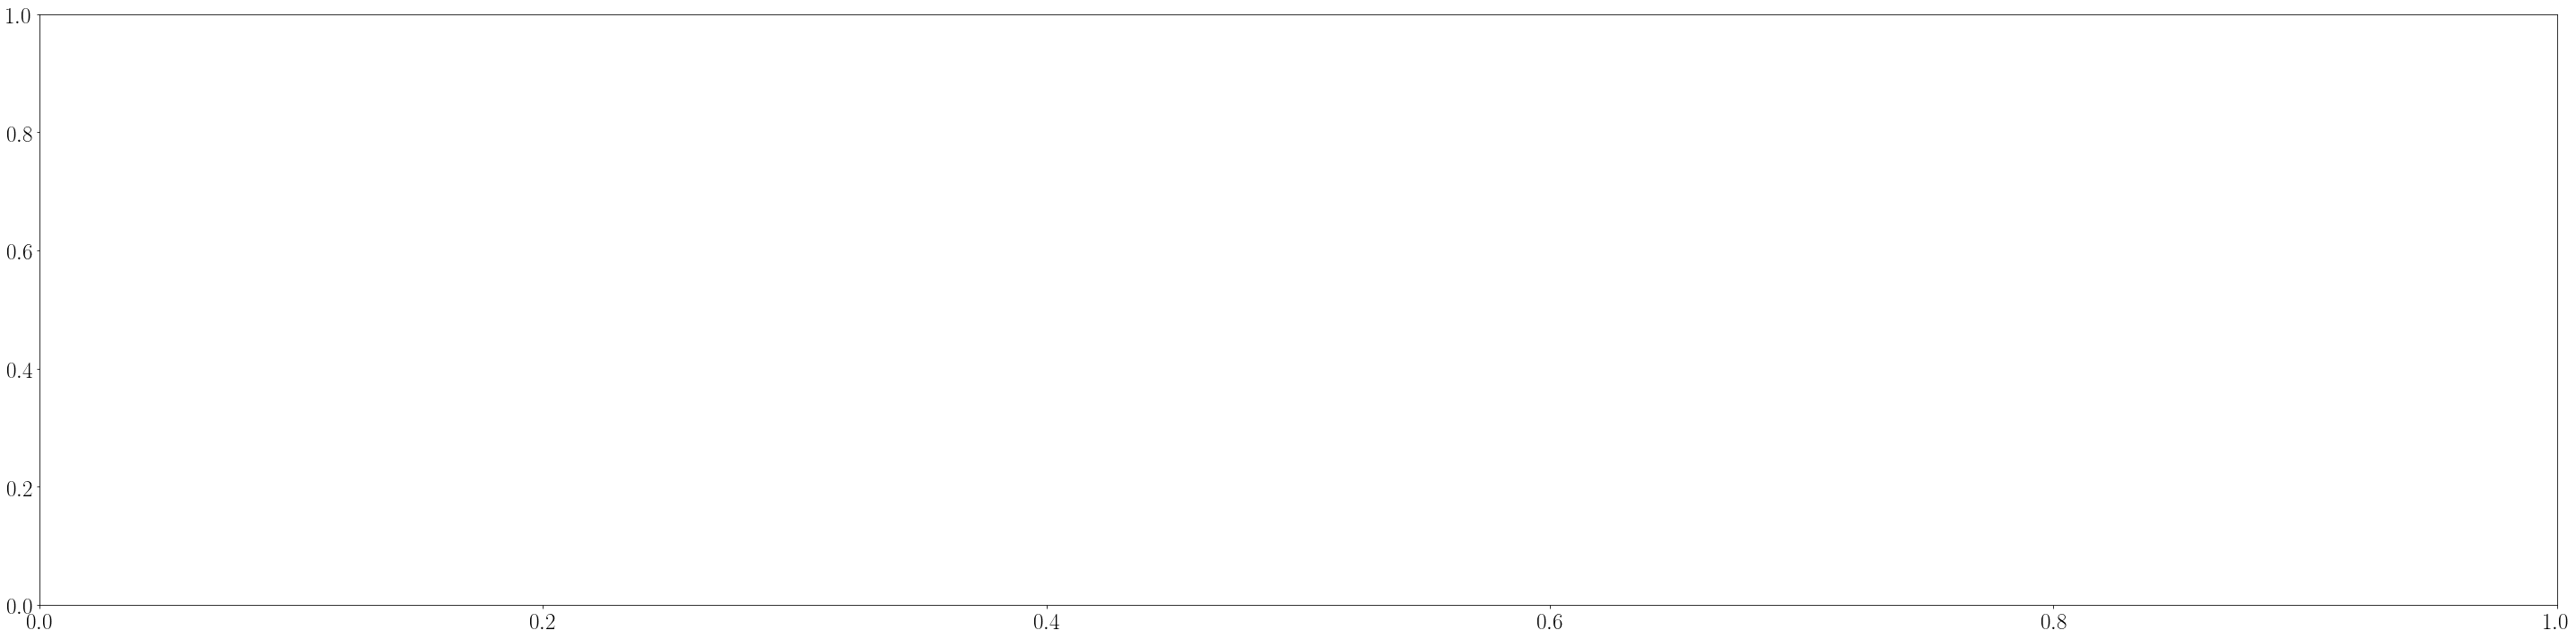

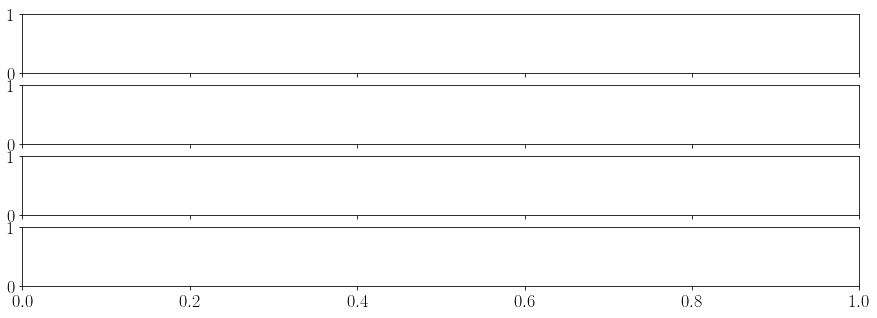

In [18]:
plt.figure(figsize=(40,10))
set_plot(fontsize = 18)
f, axarr = plt.subplots(4, sharex = True, figsize = (15,5))
cmap = colors.ListedColormap(['blue', 'limegreen','orange'])
axarr[0].imshow(result1[np.newaxis,:], cmap =cmap, aspect= "auto", extent = extent)
axarr[0].set_ylabel('Linear Sketch (k = 20)',rotation=0, fontsize = fontsize, labelpad = 90)
axarr[1].imshow(result2[np.newaxis,:], cmap =cmap, aspect= "auto", extent = extent)
axarr[1].set_ylabel('Two-Pass Tucker (k = 20, r = 10)',rotation=0, fontsize = fontsize, labelpad = 130)
axarr[2].imshow(result3[np.newaxis,:], cmap =cmap, aspect= "auto", extent = extent)
axarr[2].set_ylabel('One-Pass Tucker (k = 20, r = 10)',rotation=0, fontsize = fontsize, labelpad = 130)
axarr[3].imshow(result4[np.newaxis,:], cmap =cmap, aspect= "auto", extent = extent)
axarr[3].set_ylabel('One-Pass Tucker (k = 300, r = 10)',rotation=0, fontsize = fontsize, labelpad = 130)
[ax.set_yticks([]) for ax in axarr] 
#ax1.set_xticklabels(['', 0,10,20,30,40])
axarr[3].set_xlabel('Frame', fontsize = fontsize)
plt.tight_layout()

plt.savefig('plots/'+'video_frame_classification.pdf')
